# Homework Assignment 7

**Question 1:** Select a book and construct a network of people and locations (20pt). Visualize the network using Cytoscape or Gephi (20pt).


In [10]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from collections import Counter
from IPython.display import Image

In [2]:
nlp = spacy.load('en_core_web_lg')
book_path = "./the hobbit.txt"

def get_entites_dict_from_text(text):
    entities_dict= {}
    #using spaCy to get entities
    doc = nlp(text)
    for entity in doc.ents:
        label = entity.label_
        e = entity.text.lower()
        if  label not in entities_dict:
            entities_dict[label] = {}
        if e not in entities_dict[label]:
            entities_dict[label][e] = 0
        entities_dict[label][e] += 1
    return entities_dict

def get_book_entities(path, person_min_times, other_entities_min_times=3):
    txt = open(path,"r", encoding="utf8", errors="ignore").read()
    txt = txt.replace("\n", " ")
    doc = nlp(txt)
    d = get_entites_dict_from_text(txt) 
    entities_dict = {}
    for k in d.keys():
        min_times = other_entities_min_times
        if k == "PERSON":
            min_times = person_min_times
        entity_dict = {k:v for k,v in d[k].items() if v>min_times}
        entities_dict[k] = entity_dict
    return entities_dict

entities_dict = get_book_entities(book_path, 20)
entities_dict

{'ORG': {'  ': 506,
  'thror': 4,
  'smaug': 36,
  'moria': 6,
  'orcrist': 4,
  'goblins’': 5,
  'eagles': 17,
  'carrock': 9,
  'mirkwood': 6,
  'attercop': 6,
  'elvenking': 12,
  'bard': 4},
 'PERSON': {'bilbo': 526,
  '  ': 718,
  'thorin': 215,
  'elrond': 25,
  'baggins': 74,
  'gandalf': 178,
  'kili': 37,
  'fili': 47,
  'dori': 37,
  'bombur': 35,
  'dale': 33,
  'smaug': 37,
  'william': 27,
  'bert': 28,
  'tom': 21,
  'gollum': 81,
  'beorn': 62,
  'bard': 24,
  'dain': 27},
 'WORK_OF_ART': {'  ': 24, 'the master': 9, 'farewell': 6},
 'EVENT': {},
 'CARDINAL': {'one': 128,
  'two': 64,
  'three': 23,
  'four': 9,
  'thirteen': 7,
  'twelve': 8,
  'six': 9,
  'half': 15,
  'ten': 4,
  'fourteen': 6,
  'hundreds': 8,
  'fifteen': 6},
 'LAW': {},
 'NORP': {'dwalin': 6},
 'LOC': {'mountain': 97,
  'misty mountains': 6,
  'east': 20,
  'mirkwood': 12,
  'west': 15,
  'south': 21,
  'north': 23,
  'the running river': 6,
  'the long lake': 4,
  'the mountain': 5,
  'the misty mo

In [7]:
def get_links(txt):
    links_set = set()
    doc = nlp(txt)
    l = [entity.text.lower().strip() for entity in doc.ents if entity.label_ == "PERSON" or entity.label_ == "LOC"]
    for e1 in l:
        for e2 in l:
            if e1 == e2 or len(e1) < 2 or len(e2)< 2:
                continue
            if e1 > e2:
                e1, e2 = e2, e1 # switch order
            links_set.add((e1,e2))
    return links_set


txt = open(book_path).read()
paragraphs_list = txt.split("\n\n")
links_dict = {}
links_list = []    
for para in tqdm(paragraphs_list):
    # for each paragraph each link counts only once
    links_list += list(get_links(para))

100%|██████████| 2525/2525 [00:26<00:00, 95.23it/s] 


In [9]:
c = Counter(links_list)
c.most_common(40)

[(('bilbo', 'gandalf'), 46),
 (('bilbo', 'thorin'), 35),
 (('bilbo', 'gollum'), 27),
 (('fili', 'kili'), 20),
 (('baggins', 'bilbo'), 19),
 (('baggins', 'gandalf'), 14),
 (('gandalf', 'thorin'), 14),
 (('bilbo', 'fili'), 13),
 (('bilbo', 'dori'), 13),
 (('bilbo', 'kili'), 12),
 (('mountain', 'thorin'), 12),
 (('balin', 'bilbo'), 12),
 (('bifur', 'bofur'), 11),
 (('baggins', 'thorin'), 10),
 (('fili', 'thorin'), 10),
 (('bilbo', 'bombur'), 9),
 (('bilbo', 'mountain'), 9),
 (('beorn', 'gandalf'), 9),
 (('arkenstone', 'thorin'), 9),
 (('dori', 'nori'), 8),
 (('beorn', 'bilbo'), 8),
 (('dain', 'thorin'), 8),
 (('kili', 'thorin'), 7),
 (('bert', 'william'), 7),
 (('bert', 'tom'), 7),
 (('elrond', 'gandalf'), 7),
 (('dori', 'ori'), 6),
 (('bofur', 'nori'), 6),
 (('dori', 'fili'), 6),
 (('dori', 'kili'), 6),
 (('bofur', 'dori'), 6),
 (('bilbo', 'smaug'), 6),
 (('bifur', 'bilbo'), 5),
 (('balin', 'kili'), 5),
 (('balin', 'fili'), 5),
 (('bifur', 'ori'), 5),
 (('bifur', 'dori'), 5),
 (('bifur',

In [11]:
g = nx.Graph()
for e,count in dict(c).items():
    if count < 5:
        # only links that appeared at least 5 times
        continue
    v1,v2 = e
    g.add_edge(v1,v2, weight=count)
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 26\nNumber of edges: 48\nAverage degree:   3.6923'

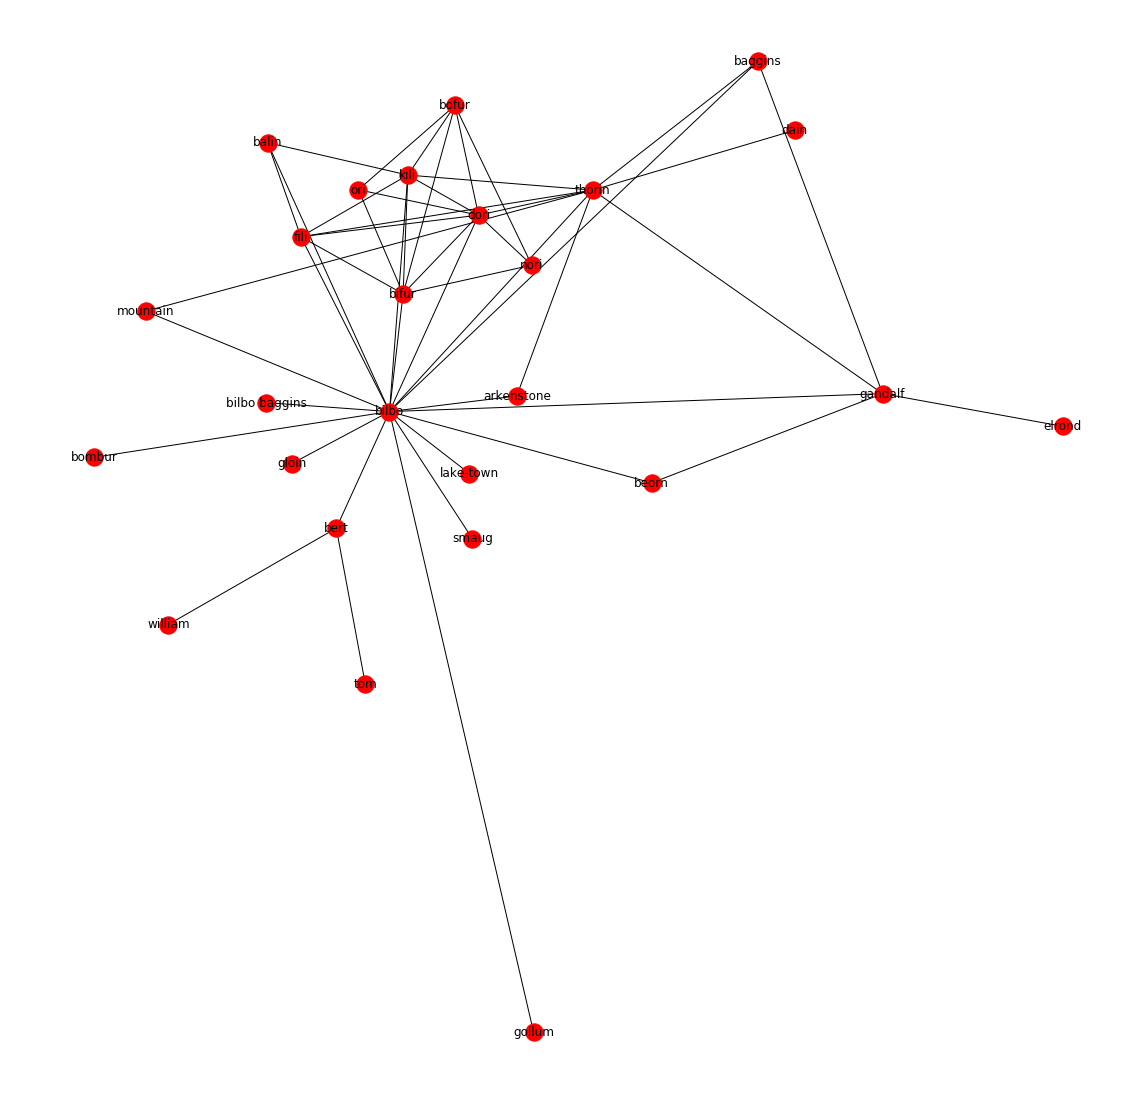

In [14]:
plt.figure(figsize=(15,15))
nx.draw_kamada_kawai(g, with_labels=True)

In [19]:
nx.write_graphml_lxml(g, "hobbit.graphml")

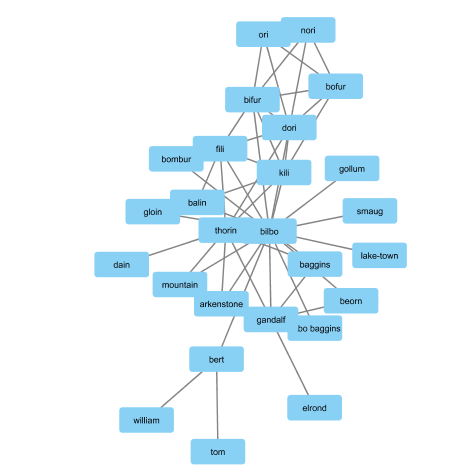

In [23]:
Image(filename = "./hobbit network.PNG", width=1000, height=1000)

**Question 2:** Use the [Seinfeld Text corpus](https://www.kaggle.com/luongleanstocode/seinfeld-text-corpus)
to create a weighted social networks of Seinfeld characters. 
Visualize the number of lines each character of the show said (only for the main characters) (20pt).
Create a classifier that given a line of text can predict
 if the line was said by Jerry, Elaine, George, or Kramer (30pt).
Evaluate your classifier (10pt).

In [54]:
import pandas as pd
import re
import seaborn as sns
import spacy
import turicreate as tc
from afinn import Afinn
import en_core_web_lg
from tqdm import tqdm_notebook as tqdm
from textblob import TextBlob

In [38]:
with open("./seinfeld_corpus.txt") as f:
    seinfeld_corpus = f.read()
entities_dict = get_entites_dict_from_text(seinfeld_corpus[:999999]) # sample beacuse of error with more text
main_characters = [(k,v) for k, v in entities_dict['PERSON'].items() if v > 300]
characters_speech_count = {}
for character in main_characters:
    current_character = character[0].upper()
    characters_speech_count[current_character] = len(re.findall( r'' + current_character +':', seinfeld_corpus))

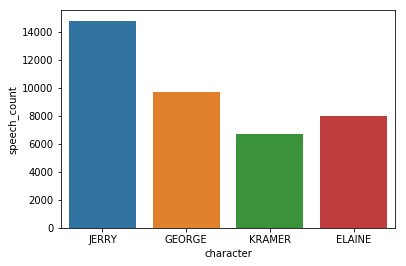

In [39]:
character_speech_df = pd.DataFrame(list(characters_speech_count.items()), columns=['character', 'speech_count'])
sns.barplot(data=character_speech_df, x='character', y='speech_count')

In [43]:
dialoges = re.split('\n', seinfeld_corpus)
def get_links(txt):
    links_set = set()
    doc = nlp(txt)
    l = [entity.text.lower().strip() for entity in doc.ents if entity.label_ == "PERSON" or entity.label_ == "LOC"]
    for e1 in l:
        for e2 in l:
            if e1 == e2 or len(e1) < 2 or len(e2)< 2:
                continue
            if e1 > e2:
                e1, e2 = e2, e1 # switch order
            links_set.add((e1,e2))
    return links_set


links_list = []
for dialogue in tqdm(dialoges):
    if dialogue != '':
        # for each dialogue each link counts only once
        links_list += list(get_links(dialogue))

100%|██████████| 64919/64919 [08:24<00:00, 128.72it/s]


In [44]:
c = Counter(links_list)
c.most_common(40)

[(('george', 'jerry'), 1649),
 (('elaine', 'jerry'), 1582),
 (('jerry', 'kramer'), 985),
 (('elaine', 'george'), 791),
 (('elaine', 'kramer'), 480),
 (('george', 'kramer'), 428),
 (('george', 'susan'), 216),
 (('jerry', 'newman'), 205),
 (('elaine', 'peterman'), 147),
 (('kramer', 'newman'), 129),
 (('helen', 'jerry'), 109),
 (('helen', 'morty'), 103),
 (('jerry', 'morty'), 100),
 (('frank', 'george'), 63),
 (('jerry', 'susan'), 62),
 (('george', 'wilhelm'), 62),
 (('jerry', 'leo'), 59),
 (('elaine', 'puddy'), 53),
 (('elaine', 'pitt'), 50),
 (('elaine', 'lippman'), 48),
 (('george', 'kruger'), 44),
 (('elaine', 'susan'), 43),
 (('bania', 'jerry'), 43),
 (('frank', 'kramer'), 38),
 (('elaine', 'newman'), 37),
 (('brett', 'elaine'), 36),
 (('jerry', 'jerry seinfeld'), 35),
 (('george', 'monk'), 35),
 (('george', 'steinbrenner'), 34),
 (('david', 'elaine'), 33),
 (('elaine', 'monk'), 32),
 (('jerry', 'uncle leo'), 31),
 (('elaine', 'kevin'), 31),
 (('george', 'peterman'), 30),
 (('jerry'

In [47]:
g = nx.Graph()
for e,count in dict(c).items():
    if count < 30:
        # only links that appeared at least 5 times
        continue
    v1,v2 = e
    g.add_edge(v1,v2, weight=count)
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 24\nNumber of edges: 34\nAverage degree:   2.8333'

/data/home/laadan/anaconda3/envs/BigData/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


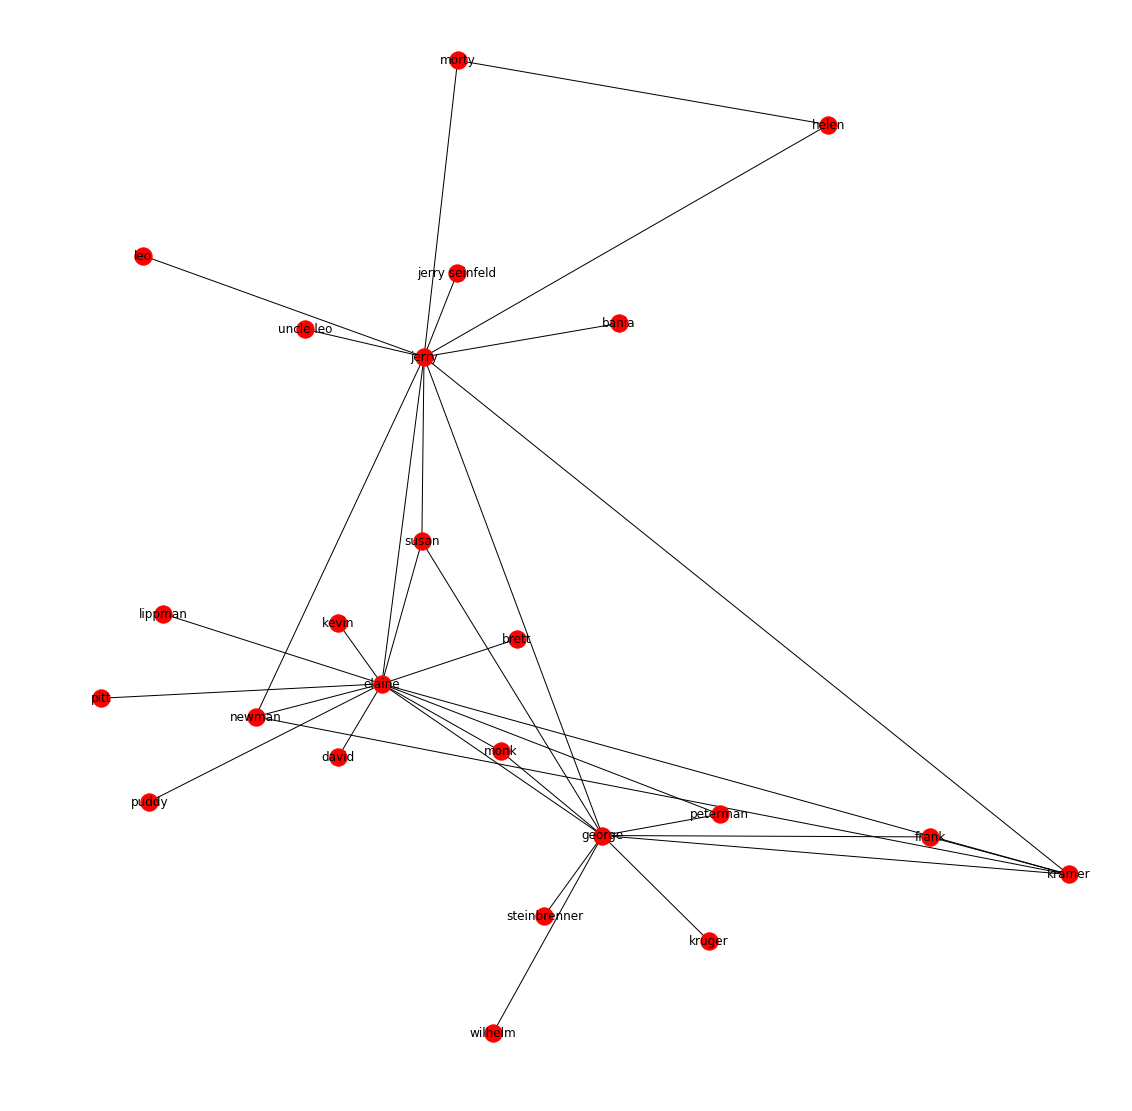

In [48]:
plt.figure(figsize=(15,15))
nx.draw_kamada_kawai(g, with_labels=True)

In [50]:
seinfeld_df = pd.DataFrame(columns=['line', 'character'])
for character in main_characters:
    current_character = character[0].upper()
    all_sentences = re.findall(r'' + current_character + ': .*\n', seinfeld_corpus)
    for sentence in all_sentences:
        seinfeld_df = seinfeld_df.append({'line': sentence.replace(current_character + ':', '').replace('\n', ''), 'character': current_character}, ignore_index=True)
seinfeld_df.head()

,line,character
0,Do you know what this is all about? Do you kn...,JERRY
1,"(pointing at George's shirt) See, to me, that...",JERRY
2,"You do of course try on, when you buy?",JERRY
3,"Oh, you don't recall?",JERRY
4,"Well, senator, I'd just like to know, what yo...",JERRY


In [63]:
afinn = Afinn()
nlp = en_core_web_lg.load()
seinfeld_sf = tc.SFrame(seinfeld_df)
seinfeld_sf['words_dict'] = tc.text_analytics.count_words(seinfeld_sf['line'])
seinfeld_sf['words_dict_no_stop'] = seinfeld_sf['words_dict'].dict_trim_by_keys(tc.text_analytics.stop_words(lang='en'), exclude=True)
seinfeld_sf['words_2grams'] = tc.text_analytics.count_ngrams(seinfeld_sf['line'], n=2, method='word')
seinfeld_sf['words_2grams'] = seinfeld_sf['words_2grams'].dict_trim_by_keys(tc.text_analytics.stop_words(lang='en'), exclude=True)
seinfeld_sf['words_3grams'] = tc.text_analytics.count_ngrams(seinfeld_sf['line'], n=3, method='word')
seinfeld_sf['words_3grams'] = seinfeld_sf['words_3grams'].dict_trim_by_keys(tc.text_analytics.stop_words(lang='en'), exclude=True)
seinfeld_sf['afinn'] = seinfeld_sf['line'].apply(lambda t: afinn.score(t))
seinfeld_sf['blob'] = seinfeld_sf['line'].apply(lambda t: TextBlob(t).sentiment.polarity)


In [ ]:
l = []
for i in tqdm(range(len(seinfeld_sf))):
    text = seinfeld_sf[i]["line"]
    l.append(nlp(text).vector)
seinfeld_sf['embbeddings'] = l

In [65]:
train, test = seinfeld_sf.random_split(0.75)
train.head()

line,character,words_dict,words_dict_no_stop
"(pointing at George'sshirt) See, to me, that ...",JERRY,"{'your': 1, 'with': 1,'live': 1, 'like': 1, ...","{'live': 1, 'mother': 1,'land': 1, 'high': 1, ..."
"You do of course try on,when you buy? ...",JERRY,"{'buy': 1, 'do': 1,'when': 1, 'of': 1, ...",{'buy': 1}
"Oh, you don't recall?",JERRY,"{'recall': 1, 't': 1,'don': 1, 'oh': 1, 'y ...","{'recall': 1, 'don': 1}"
"Well, senator, I'd justlike to know, what you ...",JERRY,"{'it': 1, 'when': 1,'you': 2, 'what': 1, ...","{'senator': 1, 'knew': 2}"
"Can you relax, it's acup of coffee. Claire is ...",JERRY,"{'professional': 1,'claire': 1, 'of': 1, ...","{'professional': 1,'claire': 1, 'cup': 1, ..."
"Well, there's this uh,woman might be comin' ...",JERRY,"{'be': 1, 'in': 1,'might': 1, 'this': 1, ...","{'comin': 1, 'uh': 1,'woman': 1} ..."
"Oh, she's really great.I mean, she's got like a ...",JERRY,"{'much': 1, 'know': 1,'is': 1, 'talking': 2, ...","{'talking': 2, 'pretty':1, 'great': 1, 'warmth': ..."
"Oh, nothing happened,you know, but is was ...",JERRY,"{'was': 1, 'nothing': 1,'oh': 1, 'is': 1, ...","{'happened': 1, 'great':1} ..."
Yeah.,JERRY,{'yeah': 1},{'yeah': 1}
"Yeah, well...notexactly. I mean, she ...",JERRY,"{'together': 1, 'get': 1,'we': 1, 'maybe': 1, ...","{'seminar': 1, 'yeah': 1,'called': 1, 'll': 1, ..."


In [66]:
cls = tc.classifier.create(train, features=['words_2grams','words_3grams', 'afinn','words_dict_no_stop', 'embbeddings'], target="character")
cls.evaluate(test)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 29432

Number of classes           : 4

Number of feature columns   : 5

Number of unpacked features : 288744

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.730709     | 0.420767          | 0.418697            | 1.347354          | 1.353523            |

| 2         | 1.446109     | 0.432217          | 0.420013            | 1.319641          | 1.332106            |

| 3         | 2.139970     | 0.442036          | 0.424621            | 1.298506          | 1.315488            |

| 4         | 2.832049     | 0.448356          | 0.430546            | 1.280625          | 1.304805            |

| 5         | 3.556606     | 0.453894          | 0.440421            | 1.264978          | 1.294858            |

| 10        | 6.964416     | 0.477134          | 0.442396            | 1.215149          | 1.274318            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 29432

Number of classes           : 4

Number of feature columns   : 5

Number of unpacked features : 288744

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.702553     | 0.414447          | 0.419355            | 1.292989          | 1.300563            |

| 2         | 1.384271     | 0.425387          | 0.431205            | 1.286200          | 1.295787            |

| 3         | 2.061249     | 0.429295          | 0.426596            | 1.283549          | 1.297569            |

| 4         | 2.698353     | 0.429498          | 0.433180            | 1.283642          | 1.296395            |

| 5         | 3.338439     | 0.427528          | 0.430546            | 1.283749          | 1.296592            |

| 10        | 6.653715     | 0.429125          | 0.432521            | 1.282194          | 1.298445            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 29432

Number of classes           : 4

Number of feature columns   : 5

Number of unpacked features : 288744

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.733688     | 0.420767          | 0.418697            | 1.288623          | 1.309699            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 29432

Number of classes           : 4

Number of feature columns   : 5

Number of unpacked features : 288744

Number of coefficients      : 866235

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 0.796045     | 0.464053          | 0.403555            |

| 1         | 7        | 1.250000  | 6.242457     | 0.703452          | 0.432521            |

| 2         | 8        | 1.250000  | 11.128696    | 0.813264          | 0.431205            |

| 3         | 9        | 1.250000  | 16.411131    | 0.868069          | 0.417380            |

| 4         | 10       | 1.250000  | 21.276484    | 0.886994          | 0.397630            |

| 6         | 12       | 1.250000  | 31.068775    | 0.904458          | 0.381830            |

| 7         | 13       | 1.250000  | 35.972559    | 0.914481          | 0.396972            |

| 8         | 14       | 1.250000  | 41.070646    | 0.917539          | 0.403555            |

| 9         | 15       | 1.250000  | 46.190871    | 0.921548          | 0.393022            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.4423963133640553
PROGRESS: RandomForestClassifier          : 0.4325213956550362
PROGRESS: DecisionTreeClassifier          : 0.4186965108624095
PROGRESS: LogisticClassifier              : 0.39302172481895986
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


{'accuracy': 0.4045613580406894,
 'auc': 0.6071047544208094,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |    JERRY     |      KRAMER     |   97  |
 |    ELAINE    |      ELAINE     |   97  |
 |    JERRY     |      GEORGE     |   71  |
 |    GEORGE    |      KRAMER     |   92  |
 |    JERRY     |      JERRY      |  2629 |
 |    GEORGE    |      ELAINE     |   55  |
 |    JERRY     |      ELAINE     |   49  |
 |    GEORGE    |      JERRY      |  1659 |
 |    KRAMER    |      GEORGE     |   84  |
 |    ELAINE    |      JERRY      |  1301 |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.26329788301245816,
 'log_loss': 1.2951079488752653